In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
data = pd.read_csv("retail-shop.csv")
data.head(), data.size

(   Satisfaction  Loyalty
 0             4    -1.33
 1             6    -0.28
 2             5    -0.99
 3             7    -0.29
 4             4     1.06,
 60)

# Plot the data 

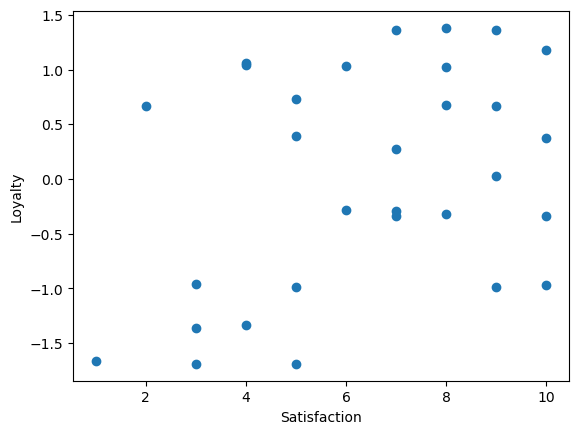

In [28]:
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

# Implement the model

In [58]:
x = data.copy()
clusters = data.copy()

kmeans = KMeans(2, random_state=42)
kmeans.fit(x)
clusters["Cluster"] = kmeans.predict(x)
clusters["Cluster"].unique()

array([0, 1], dtype=int32)

# Plot the clusters

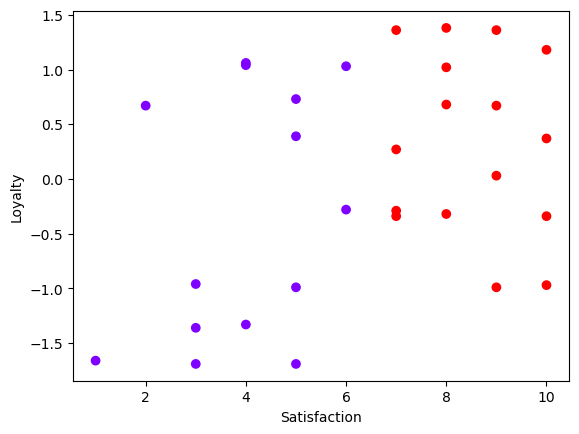

In [59]:
plt.scatter(clusters.Satisfaction, clusters.Loyalty, c=clusters.Cluster, cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

# Standardize the variables

In [60]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# Elbow method to calculate the number of clusters

ValueError: too many values to unpack (expected 2)

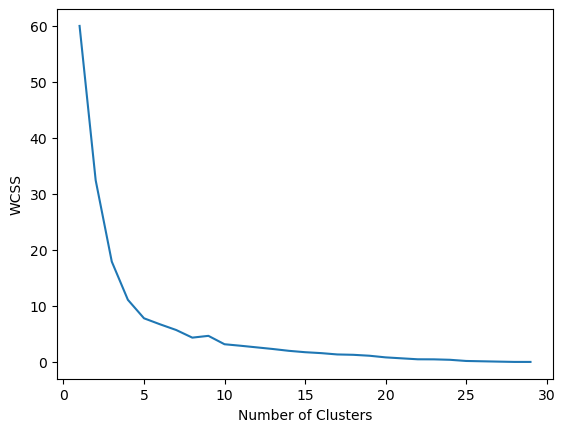

In [68]:
wcss = []

length = len(clusters)
for i in range(1, len(clusters)):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss_i = kmeans.inertia_
  wcss.append(wcss_i)

plt.plot(range(1, length), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xlim([x for x in range(0, int(length / 2), 1)])
plt.xticks([x for x in range(0, int(length / 2), 1)])
plt.show()